In [1]:
import tensorflow as tf
import numpy as np
import itertools
import os
import math

In [2]:
train_dataset = tf.keras.utils.image_dataset_from_directory('X-ray_Dataset', validation_split=0.13, subset="training", seed=42, batch_size=8, image_size=(256,256),label_mode="categorical",labels="inferred")

Found 21709 files belonging to 5 classes.
Using 18887 files for training.


In [3]:
test_dataset = tf.keras.utils.image_dataset_from_directory('X-ray_Dataset', validation_split=0.13, subset="validation", seed=42, batch_size=8, image_size=(256,256),label_mode="categorical",labels="inferred")

Found 21709 files belonging to 5 classes.
Using 2822 files for validation.


In [4]:
classes = train_dataset.class_names
numClasses = len(train_dataset.class_names)
print(classes)

['Bacterial Pneumonia', 'COVID', 'Normal', 'Tuberculosis', 'Viral Pneumonia']


In [5]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [6]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model=Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(64,3,padding="same",activation="relu",input_shape=(256,256,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3,padding="same",activation="relu",input_shape=(256,256,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(256,3,padding="same",activation="relu",input_shape=(256,256,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(512,3,padding='same',activation="relu",input_shape=(256,256,3)),
    layers.MaxPooling2D(),
    layers.Dropout(0.5),
    layers.Flatten(),
    
    layers.Dense(512,activation='relu'),
    layers.Dense(256,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(numClasses,activation="softmax")
])

In [7]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer='adam',metrics=['accuracy'])

In [8]:
history=model.fit(train_dataset,validation_data=test_dataset,epochs=10,verbose=1)

Epoch 1/10
2361/2361 [==============================] - 368s 151ms/step - loss: 0.6137 - accuracy: 0.7604 - val_loss: 0.4806 - val_accuracy: 0.8267
Epoch 2/10
2361/2361 [==============================] - 318s 135ms/step - loss: 0.3538 - accuracy: 0.8714 - val_loss: 0.3259 - val_accuracy: 0.8809
Epoch 3/10
2361/2361 [==============================] - 270s 114ms/step - loss: 0.2729 - accuracy: 0.8986 - val_loss: 0.2974 - val_accuracy: 0.8972
Epoch 4/10
2361/2361 [==============================] - 271s 115ms/step - loss: 0.2307 - accuracy: 0.9126 - val_loss: 0.2742 - val_accuracy: 0.9089
Epoch 5/10
2361/2361 [==============================] - 269s 114ms/step - loss: 0.2042 - accuracy: 0.9272 - val_loss: 0.2687 - val_accuracy: 0.8969
Epoch 6/10
2361/2361 [==============================] - 269s 114ms/step - loss: 0.1838 - accuracy: 0.9330 - val_loss: 0.2604 - val_accuracy: 0.9135
Epoch 7/10
2361/2361 [==============================] - 269s 114ms/step - loss: 0.1636 - accuracy: 0.9423 - val_

In [9]:
model.save('XrayClassification.h5')

In [18]:
import matplotlib.pyplot as plt

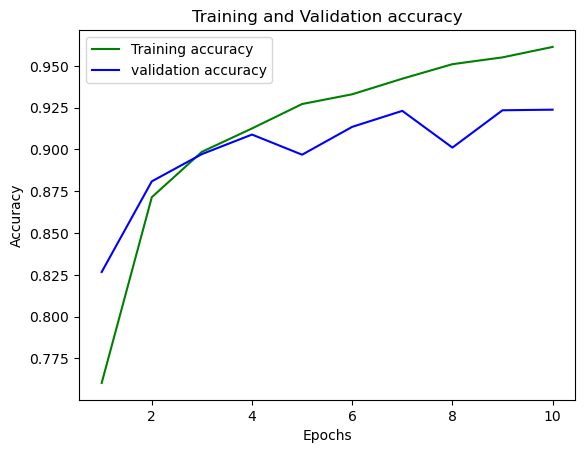

In [19]:
#Visualization
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

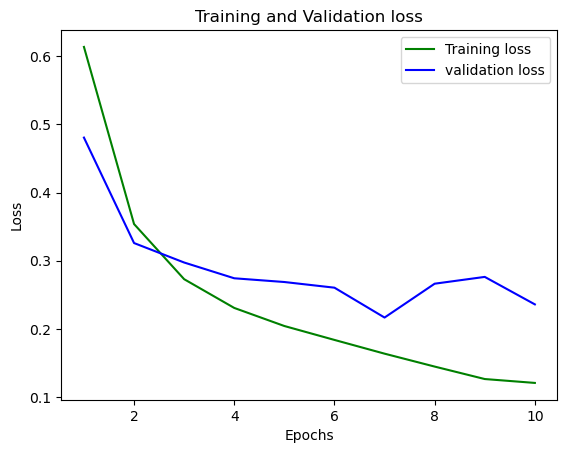

In [25]:
#Visualization
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()